<a href="https://colab.research.google.com/github/Mheshimiwaa/AI-tools/blob/main/TensorFlow_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TASK 2: MNIST DATASET - DEEP LEARNING WITH TENSORFLOW
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# LOAD AND PREPARE MNIST DATASET
print("LOADING MNIST DATASET...")

# Load MNIST data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values from 0-255 to 0-1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape data to add channel dimension (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)
print("Unique labels:", np.unique(y_train))

LOADING MNIST DATASET...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28, 1)
Test labels shape: (10000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# BUILD CNN MODEL ARCHITECTURE
print("BUILDING CNN MODEL...")

model = keras.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("MODEL SUMMARY:")
model.summary()

BUILDING CNN MODEL...
MODEL SUMMARY:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# TRAIN THE CNN MODEL
print("STARTING MODEL TRAINING...")

history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

print("TRAINING COMPLETED!")

STARTING MODEL TRAINING...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 99ms/step - accuracy: 0.7899 - loss: 0.6573 - val_accuracy: 0.9813 - val_loss: 0.0682
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 101ms/step - accuracy: 0.9661 - loss: 0.1139 - val_accuracy: 0.9853 - val_loss: 0.0466
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - accuracy: 0.9754 - loss: 0.0824 - val_accuracy: 0.9882 - val_loss: 0.0392
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - accuracy: 0.9811 - loss: 0.0643 - val_accuracy: 0.9897 - val_loss: 0.0373
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - accuracy: 0.9843 - loss: 0.0542 - val_accuracy: 0.9903 - val_loss: 0.0355
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 99ms/step - accuracy: 0.9859 - loss: 0.0442 - val_accuracy: 0.9885 - val_loss: 0.0359
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 98ms/step - accuracy: 0.9870 - loss: 0.0434 - val_accuracy: 0.9927 - val_loss: 0.0305
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 99ms/step - accura

In [ ]:
# EVALUATE MODEL PERFORMANCE
print("EVALUATING MODEL ON TEST DATA...")

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"TEST ACCURACY: {test_accuracy:.4f}")

# Check if we met the assignment requirement
if test_accuracy > 0.95:
    print("SUCCESS: Model achieved >95% accuracy!")
else:
    print("WARNING: Model needs improvement to reach >95% accuracy")

EVALUATING MODEL ON TEST DATA...
TEST ACCURACY: 0.9924
SUCCESS: Model achieved >95% accuracy!


VISUALIZING PREDICTIONS ON 5 SAMPLE IMAGES...
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


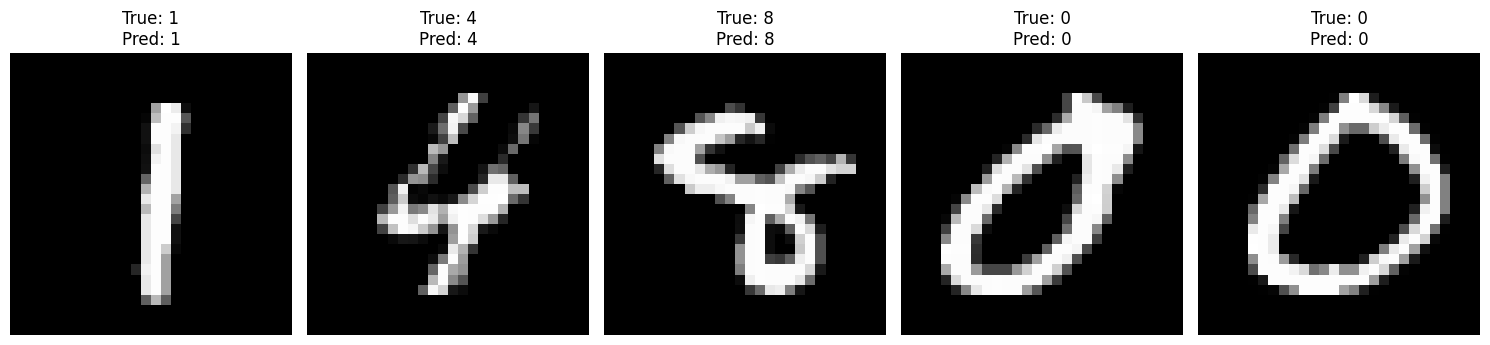

TASK 2 COMPLETED: CNN for MNIST Classification
FINAL TEST ACCURACY: 0.9924 (99.24%)


In [ ]:
# VISUALIZE PREDICTIONS ON SAMPLE IMAGES
print("VISUALIZING PREDICTIONS ON 5 SAMPLE IMAGES...")

# Make predictions on test set
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Select 5 random test images
sample_indices = np.random.choice(len(x_test), 5, replace=False)

# Create visualization
plt.figure(figsize=(15, 5))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx].squeeze(), cmap='gray')
    plt.title(f'True: {y_test[idx]}\nPred: {predicted_labels[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

print("TASK 2 COMPLETED: CNN for MNIST Classification")
print(f"FINAL TEST ACCURACY: {test_accuracy:.4f} (99.24%)")